In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
# load the data set using pandas
data=pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\oil_prices_yahoo1.csv')

In [92]:
# covertnig the date column to datetime using pandas
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# creating a data frame using pandas
df=pd.DataFrame(data)

# renaming the column to price
df.rename(columns = {'Close':'Price'}, inplace = True)

In [93]:
print(df.head())
print(df.tail())

        Date      Price
0 2000-08-23  32.049999
1 2000-08-24  31.629999
2 2000-08-25  32.049999
3 2000-08-28  32.869999
4 2000-08-29  32.720001
           Date      Price
5746 2023-07-17  74.150002
5747 2023-07-18  75.750000
5748 2023-07-19  75.349998
5749 2023-07-20  75.629997
5750 2023-07-21  77.070000


In [94]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5751 non-null   datetime64[ns]
 1   Price   5751 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.0 KB


In [95]:
df.shape

(5751, 2)

In [96]:
# checking for the null values
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [97]:
import plotly.express as px
import plotly.graph_objs as go

# Create the interactive time series map
fig = px.line(df, x='Date', y='Price', title='Time Series Map')

# Add maximum price label
max_price = df['Price'].max()
max_date = df.loc[df['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Price: {max_price} on {max_date}', showarrow=True, arrowhead=1 ,font=dict(color='red'))

# Add minimum price label
min_price = df['Price'].min()
min_date = df.loc[df['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Price: {min_price} on {min_date}', showarrow=True, arrowhead=1 ,font=dict(color='red'))

# Show the plot
fig.show()


In [98]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(monthly_data, x='Date', y='Price', title='Monthly Bar Chart')

# Add maximum price label
max_price = monthly_data['Price'].max()
max_date = monthly_data.loc[monthly_data['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Oil Price: {max_price} on {max_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Add minimum price label
min_price = monthly_data['Price'].min()
min_date = monthly_data.loc[monthly_data['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Oil Price: {min_price} on {min_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='black'))

# Show the plot
fig.show()


In [99]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
yearly_data = df.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(yearly_data, x='Date', y='Price', title='Yearly Bar Chart')

# Add maximum price label
max_price = yearly_data['Price'].max()
max_date = yearly_data.loc[yearly_data['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Oil Price: {max_price} on {max_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Add minimum price label
min_price = yearly_data['Price'].min()
min_date = yearly_data.loc[yearly_data['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Oil Price: {min_price} on {min_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Show the plot
fig.show()



In [100]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Create the interactive heatmap
fig = px.imshow(heatmap_data, title='Monthly Heatmap')

# Add year labels to y-axis
fig.update_yaxes(tickvals=list(range(len(heatmap_data.index))), ticktext=[calendar.month_name[i] for i in heatmap_data.index])

# Show the plot
fig.show()


In [101]:
# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Find the minimum and maximum values in the heatmap data
min_value = heatmap_data.min().min()
max_value = heatmap_data.max().max()

print(f"The minimum value in the heatmap is: {min_value}")
print(f"The maximum value in the heatmap is: {max_value}")


The minimum value in the heatmap is: 16.699047678992862
The maximum value in the heatmap is: 134.01571437290735


In [102]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create the interactive scatterplot
fig = px.scatter(df, x='Date', y='Price', title='Scatterplot')

fig.show()


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(<Figure size 1250x4080 with 25 Axes>,
 array([<Axes: ylabel='2000'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

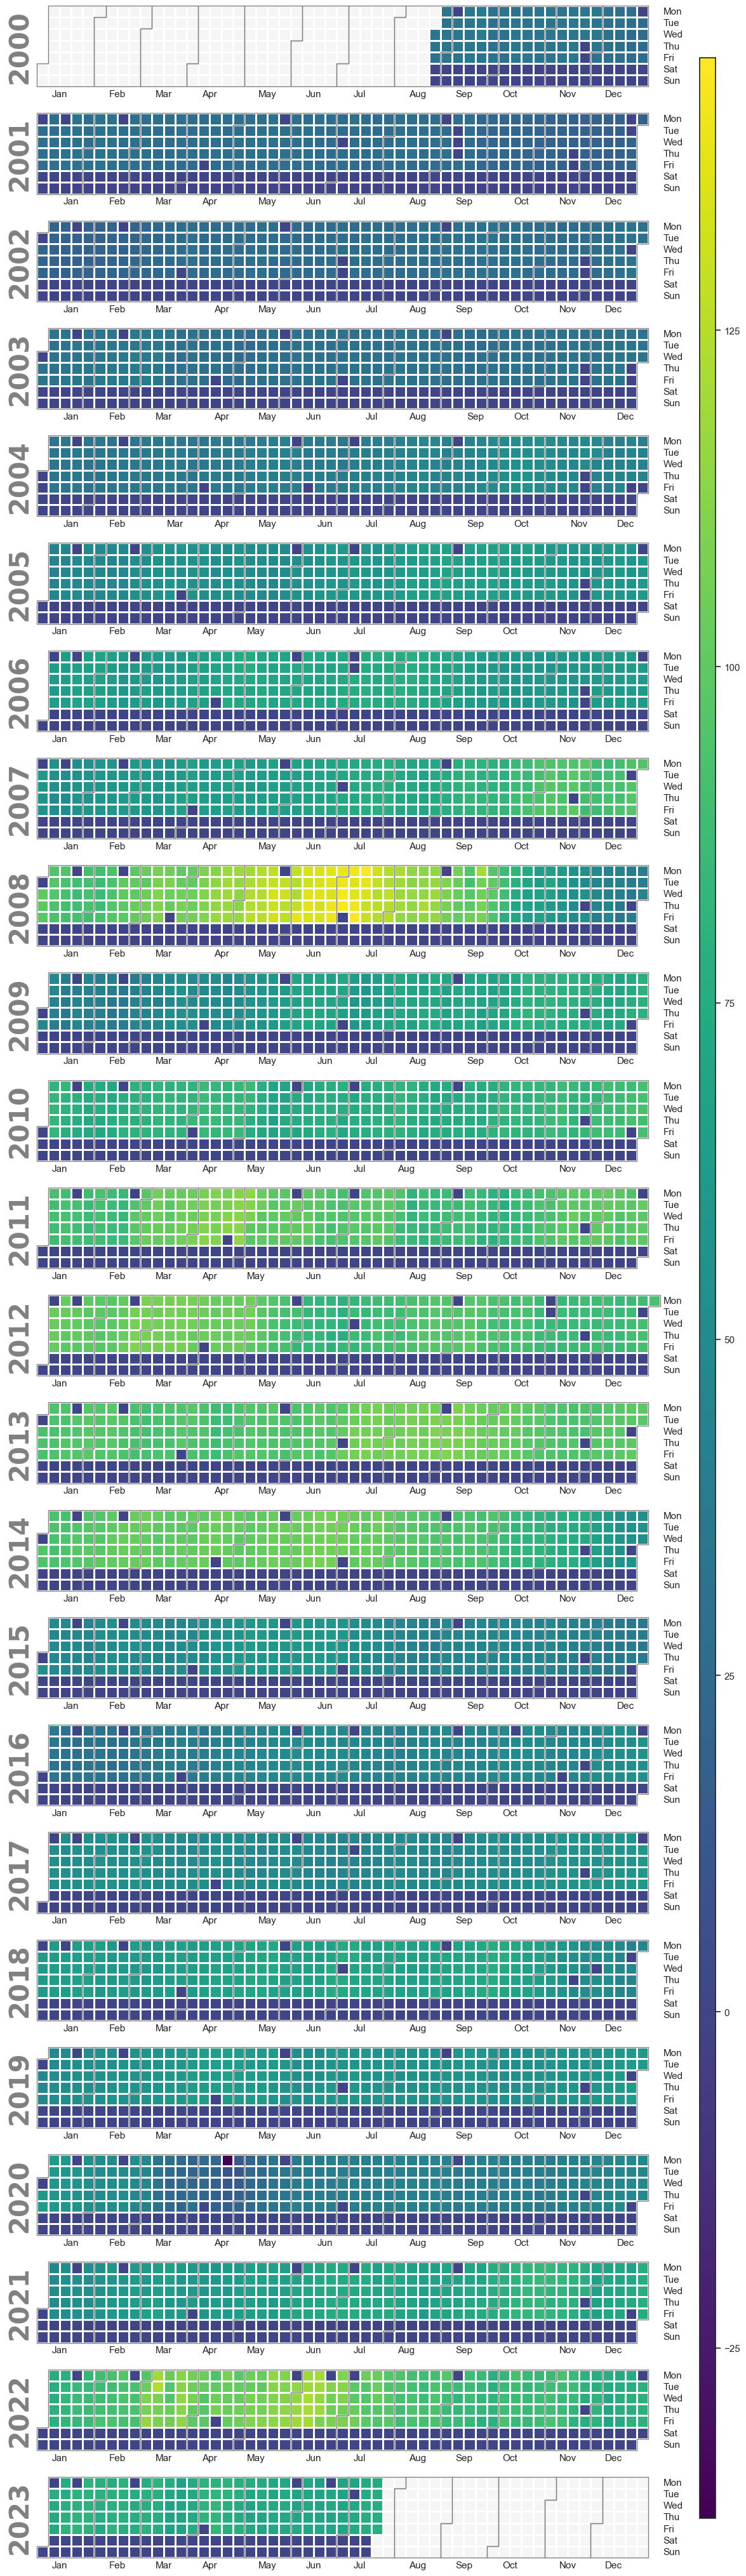

In [103]:
import calplot
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a Series with the Date as the index and the Price as the values
data = pd.Series(df['Price'].values, index=df['Date'])

# Create the interactive calendar heatmap
calplot.calplot(data)


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

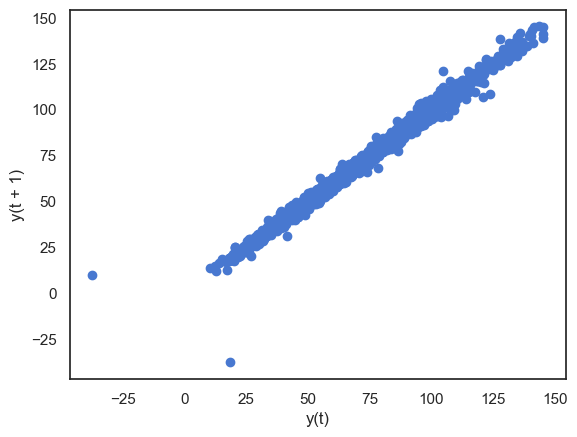

In [104]:
import pandas as pd
from pandas.plotting import lag_plot
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Create the lag plot
lag_plot(df['Price'])


In [105]:
import plotly.graph_objs as go
import pandas as pd
from scipy.signal import periodogram

# Calculate the periodogram
f, Pxx = periodogram(df['Price'])

# Create the interactive spectral density plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=f, y=Pxx))
fig.update_layout(title='Spectral Density Plot', xaxis_title='Frequency', yaxis_title='Power')
fig.show()


<Axes: xlabel='Date', ylabel='Price'>

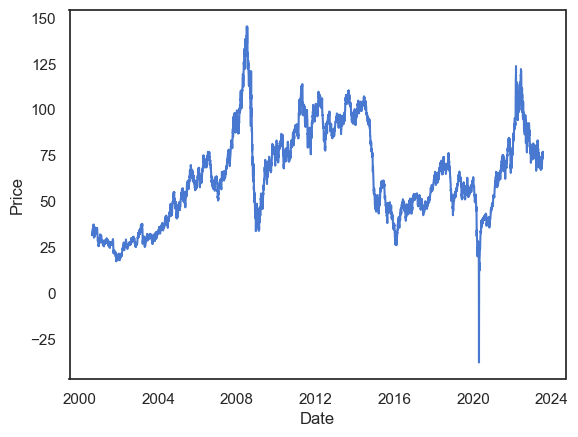

In [106]:
sns.lineplot(x = "Date", y = "Price",
             data = df)

In [107]:
df1=df.set_index("Date",drop=True)

KeyError: "None of ['Date'] are in the columns"

In [ ]:
df1

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


<Axes: xlabel='Date'>

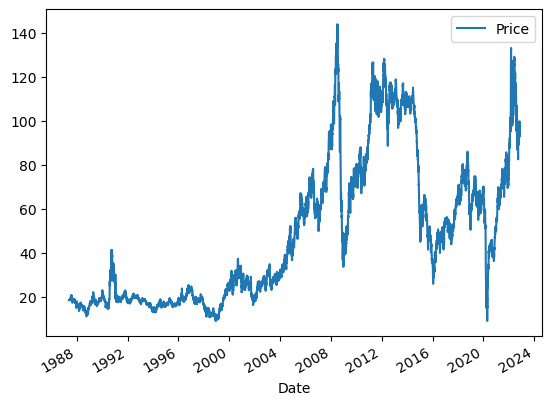

In [ ]:
df1.plot()

# Time Resampling 

In [ ]:
#"RULE A Which Means Year and Frequency"
df1.resample(rule='A').min()

,Price
Date,
1987-12-31,15.03
1988-12-31,11.20
1989-12-31,16.05
1990-12-31,14.68
1991-12-31,17.60
1992-12-31,17.05
1993-12-31,13.13
1994-12-31,13.00
1995-12-31,15.35


<Axes: xlabel='Date'>

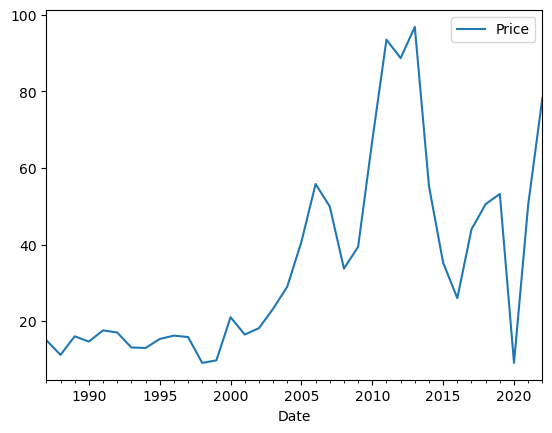

In [ ]:
df1.resample(rule='A').min().plot()

In [ ]:
df1.resample(rule='A').max()

,Price
Date,
1987-12-31,20.95
1988-12-31,17.95
1989-12-31,22.25
1990-12-31,41.45
1991-12-31,30.28
1992-12-31,21.55
1993-12-31,19.60
1994-12-31,19.03
1995-12-31,19.38


<Axes: xlabel='Date'>

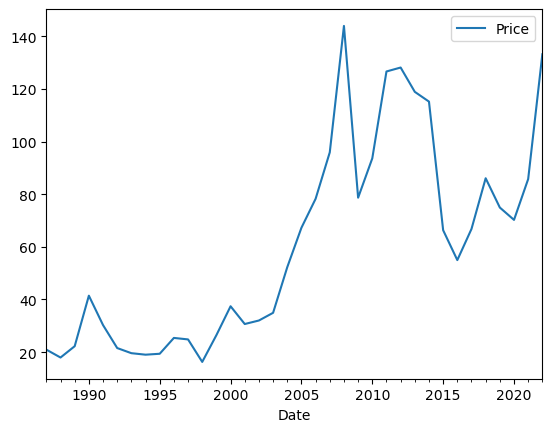

In [ ]:
df1.resample(rule='A').max().plot()

[Text(0.5, 0, 'Yearly_Max_Price'), Text(0, 0.5, 'Price')]

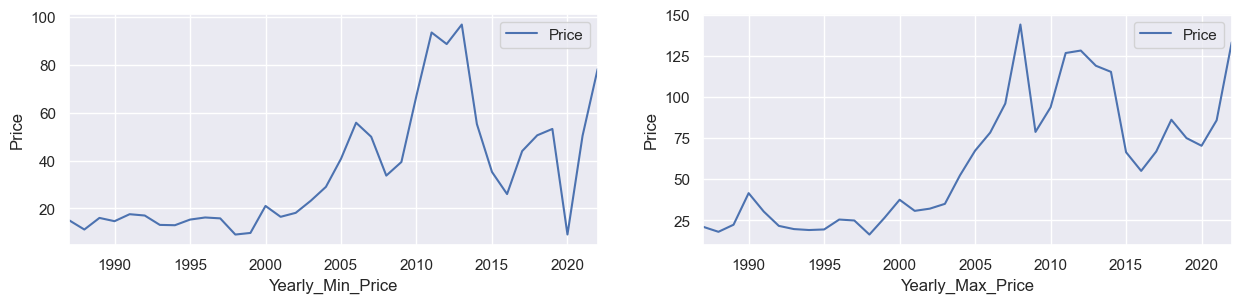

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
df1.resample(rule='A').min().plot(ax=ax1).set(xlabel='Yearly_Min_Price', ylabel='Price')
df1.resample(rule='A').max().plot(ax=ax2).set(xlabel='Yearly_Max_Price', ylabel='Price')


[Text(0.5, 0, 'Yearly_Mean_Price'), Text(0, 0.5, 'Price')]

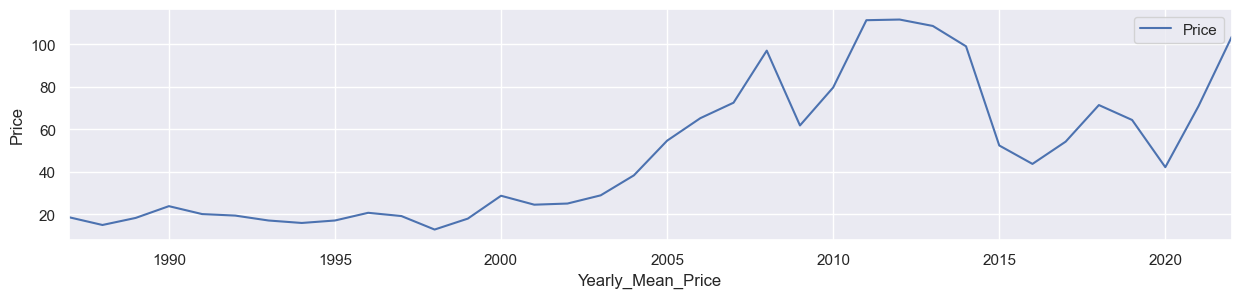

In [ ]:
df1.resample(rule='A').mean().plot().set(xlabel='Yearly_Mean_Price', ylabel='Price')

In [ ]:
#"RULE QS Which Means Quaterly and Frequency"

[Text(0.5, 0, 'Quaterly_Max_Price'), Text(0, 0.5, 'Price')]

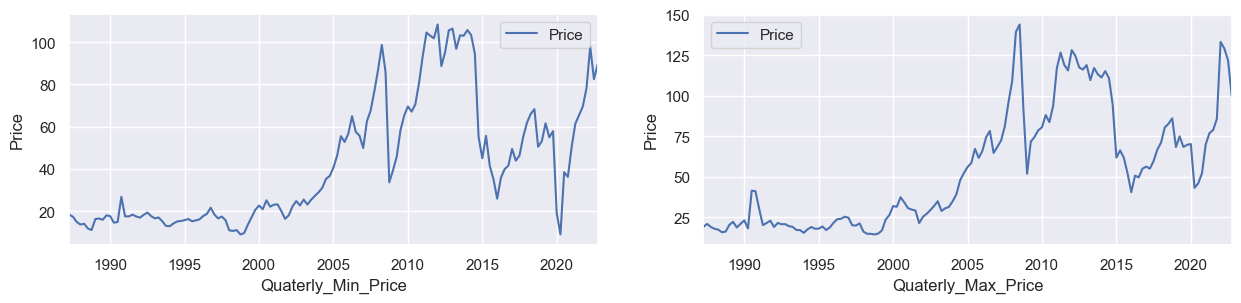

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
df1.resample(rule='QS').min().plot(ax=ax1).set(xlabel='Quaterly_Min_Price', ylabel='Price')
df1.resample(rule='QS').max().plot(ax=ax2).set(xlabel='Quaterly_Max_Price', ylabel='Price')

[Text(0.5, 0, 'Yearly_Max_Price'), Text(0, 0.5, 'Price')]

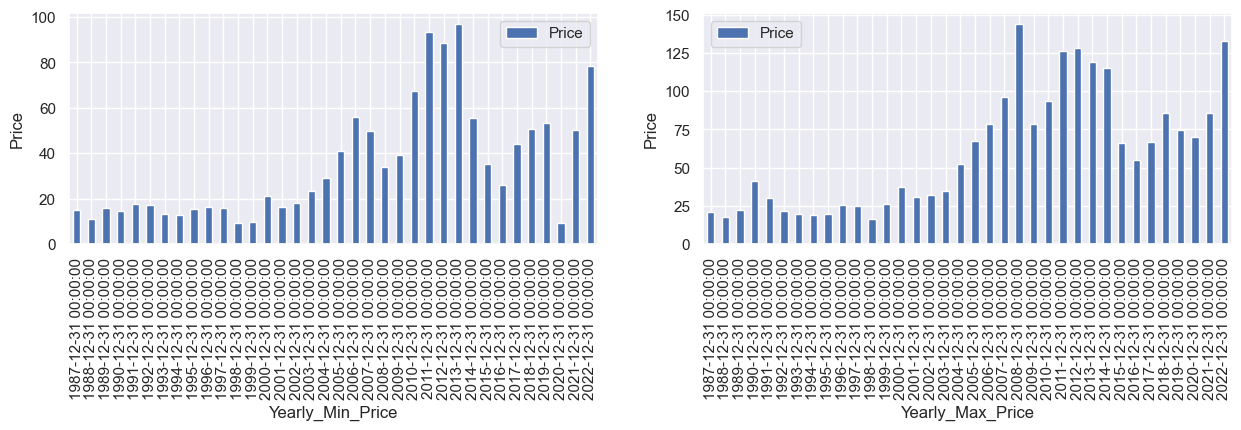

In [ ]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(15,3)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
df1.resample(rule='A').min().plot(kind='bar',ax=ax1).set(xlabel='Yearly_Min_Price', ylabel='Price')
df1.resample(rule='A').max().plot(kind='bar',ax=ax2).set(xlabel='Yearly_Max_Price', ylabel='Price')

# Rolling

In [ ]:
df1.rolling(15).mean().head(30)

,Price
Date,
1987-05-20,NaN
1987-05-21,NaN
1987-05-22,NaN
1987-05-25,NaN
1987-05-26,NaN
1987-05-27,NaN
1987-05-28,NaN
1987-05-29,NaN
1987-06-01,NaN


In [ ]:
df1['price_150 days rolling']=df1['Price'].rolling(150).mean()

<Axes: xlabel='Date'>

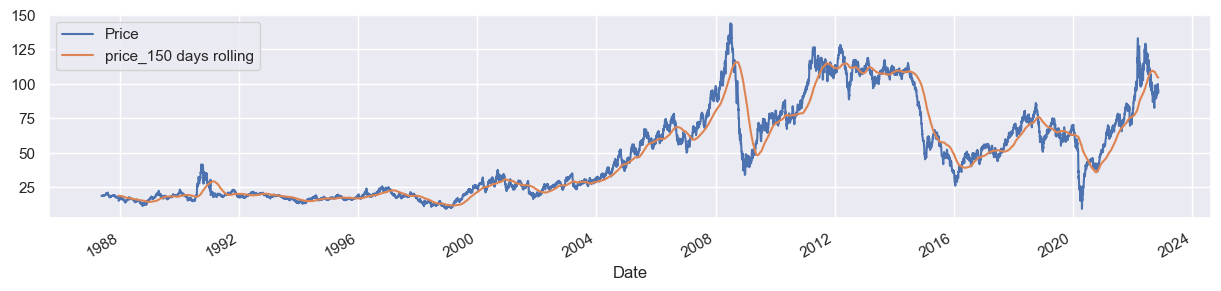

In [ ]:
df[['Price','price_150 days rolling']].plot()

In [ ]:
#By applying rolling we can get some information about smoothing
